In [1]:
%pylab inline

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import ipywidgets as widgets
import IPython.display as ipdisplay

import warnings
warnings.filterwarnings('ignore')

pylab.rcParams['figure.figsize'] = (10, 6)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
sns.set(font_scale=1.5)


figsize = (10, 6)
fontsize = 25

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## V2 ISSDA w=86400

In [2]:
clients_with = "30_issda"
clients_without = None #"_hphc_"
wall_time = 86400

df = pd.read_csv("./v2_all.csv")

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))
if clients_without is not None:
    clients = list(filter(lambda x: clients_without not in x, clients))


df = df[(df["wall_time"] == wall_time) & (df["clients"].isin(clients))]
df.days_size = df.days_size.astype(int)
df.agg_size = df.agg_size.astype(int)
df.agg_size_pc = df.agg_size_pc.astype(int)
df.success = df.success.astype(int)

df.head(5)

Unnamed: 0                                               expe  \
1856           0  ./expes/v2_2021-04-09_issda-30_1000-prng-1-w86...   
1857           0  ./expes/v2_2021-04-09_issda-30_1000-prng-1-w86...   
1858           0  ./expes/v2_2021-04-09_issda-30_1000-prng-1-w86...   
1859           0  ./expes/v2_2021-04-09_issda-30_1000-prng-1-w86...   
1860           0  ./expes/v2_2021-04-09_issda-30_1000-prng-1-w86...   

            clients  clients_size clients_subset  agg_size method  \
1856  30_issda-1000          1000     first-1000       300    rng   
1857  30_issda-1000          1000     first-1000       700    rng   
1858  30_issda-1000          1000     first-1000       800    rng   
1859  30_issda-1000          1000     first-1000       200    rng   
1860  30_issda-1000          1000     first-1000       800    rng   

               days  days_size  days_total  ...  days_size_pc  noise_method  \
1856  num-start-300        300       25726  ...            30       classic   
1857  num-start-500        500       25726  ...            50       classic   
1858  num-start-300        300       25726  ...            30       classic   
1859  num-start-700        700       25726  ...            70       classic   
1860  num-start-700        700       25726  ...            70       classic   

      score_avg  score_min  score_max  \
1856        0.0        NaN        NaN   
1857        1.0        1.0        1.0   
1858        0.0        NaN        NaN   
1859        1.0        1.0        1.0   
1860        1.0        1.0        1.0   

                                                 oracle  pool_size  \
1856  ['2', '13', '14', '15', '17', '23', '24', '28'...        2.0   
1857  ['1', '2', '3', '4', '8', '9', '10', '11', '13...        2.0   
1858  ['1', '2', '3', '4', '5', '6', '8', '9', '10',...        2.0   
1859  ['2', '3', '6', '10', '13', '23', '27', '30', ...        2.0   
1860  ['1', '2', '3', '4', '5', '6', '8', '9', '10',...        2.0   

            uuid  infeasible  optimal  
1856  81b558489a         0.0      0.0  
1857  b558601ce2         0.0      1.0  
1858  12a6d57c9d         0.0      0.0  
1859  d5c587e32a         0.0      1.0  
1860  f102637861         0.0      1.0  

[5 rows x 30 columns]

In [3]:
df_amin = df[(df["success"] == True)] # & (df.clients_size <= 2000)
df_amin = df_amin[["clients_size", "agg_size_pc", "days_size", "days_size_pc", "time"]]
df_amin = df_amin.loc[df_amin.groupby(by=["clients_size", "agg_size_pc"])["days_size"].idxmin()]
df_amin.clients_size = df_amin.clients_size.astype(str)
df_amin

clients_size  agg_size_pc  days_size  days_size_pc          time
325101         1000            5        200            20     25.062312
1912           1000           10        200            20  17736.019508
325238         1000           15        300            30    190.746768
325057         1000           20        400            40    194.269825
325058         1000           25        400            40    604.833059
1898           1000           30        400            40   1549.318894
325409         1000           35        400            40   1298.828863
325318         1000           40        400            40  56585.177377
325180         1000           45        500            50    308.616163
1887           1000           50        500            50    104.332154
1988           1000           60        400            40   3299.824572
1857           1000           70        500            50     90.668266
1960           1000           80        400            40    314.186637
1906           1000           90        300            30     90.839611
1940           1000          100        100            10     12.287030
177233         2000            5        400            20    169.709722
177192         2000           10        600            30   1751.978888
177201         2000           15        600            30   4424.651840
177342         2000           20        800            40   8578.085104
177276         2000           25        800            40  18320.565248
177444         2000           30       1000            50   4973.760533
177205         2000           35       1000            50   6542.993838
177311         2000           40       1000            50   5011.086956
177251         2000           45       1000            50   4067.553430
177272         2000           50       1000            50  21385.720202
184777         2000           60       1000            50   8016.163639
184786         2000           70       1000            50   3341.086297
184715         2000           80        800            40   1168.465085
184709         2000           90        600            30   1178.651497
184771         2000          100        200            10     16.599044
350815         3000            5        600            20   2785.270662
350875         3000           10        900            30   5190.764699
252015         3000           20       1800            60  10073.206216
351051         3000           25       1800            60  12695.227646
350879         3000           30       1800            60  20194.968265
351085         3000           35       1500            50  13818.613062
350929         3000           40       1500            50  54571.213608
351093         3000           45       1500            50  15560.802450
252070         3000           50       1500            50  53755.402191
252043         3000           60       2100            70  11611.461747
252029         3000           70       1500            50   8281.299821
252078         3000           80       1200            40  16148.162303
252041         3000           90        900            30  10637.495155
251983         3000          100        300            10     85.645793
105075         4000            5        800            20   3062.838591
105178         4000           10       1200            30   9031.483732
104978         4000           20       2000            50  22597.241459
105181         4000           25       2400            60   8421.498484
104991         4000           30       2000            50  17752.276241
105038         4000           35       2000            50  24564.749788
105016         4000           40       2000            50  14680.876701
104967         4000           45       2000            50  37641.385592
105120         4000           50       2000            50  15332.597830
618417         4000           60       2000            50  21719.334884
618487         4000           70       2000    

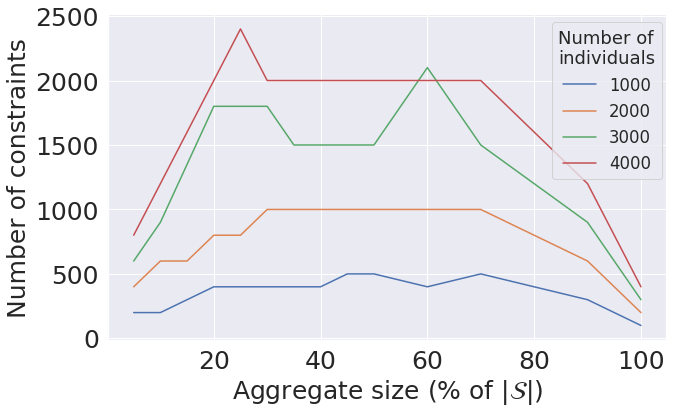

In [4]:
fig, ax = plt.subplots(figsize=figsize)

sns.lineplot(data=df_amin, x="agg_size_pc", y="days_size", hue="clients_size", ax=ax)
ax.set_xlabel("Aggregate size (% of $|\mathcal{S}|$)", fontsize=fontsize)
ax.set_ylabel('Number of constraints', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.legend(bbox_to_anchor=(0.78, 1), loc=2, ncol=1, title="Number of\nindividuals")

plt.savefig('./imgs/{}.pdf'.format('3d_w1'), bbox_inches = 'tight')

In [5]:
fig, ax = plt.subplots(figsize=figsize)

sns.lineplot(data=df_amin, x="agg_size_pc", y="days_size_pc", hue="clients_size", ax=ax)

ax.set_xlabel("Aggregate size (% of $|\mathcal{S}|$)", fontsize=fontsize)
ax.set_ylabel('Number of constraints (% of $|\mathcal{S}|$)', fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.legend(bbox_to_anchor=(0.78, 1), loc=2, ncol=1, title="Number of\nindividuals")

plt.savefig('./imgs/{}.pdf'.format('3d_pc_w1'), bbox_inches = 'tight')

## V2 ISSDA w=1000

In [6]:
clients_with = "30_issda"
clients_without = None #"_hphc_"
wall_time = 1000

df = pd.read_csv("./v2_all.csv")

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))
if clients_without is not None:
    clients = list(filter(lambda x: clients_without not in x, clients))


df = df[(df["wall_time"] == wall_time) & (df["clients"].isin(clients))]
df.days_size = df.days_size.astype(int)
df.agg_size = df.agg_size.astype(int)
df.agg_size_pc = df.agg_size_pc.astype(int)
df.success = df.success.astype(int)

df.head(5)

Unnamed: 0                                  expe        clients  \
0           0  ./expes/v2_2020-12-06_dh_3000-prng-1  30_issda_3000   
1           1  ./expes/v2_2020-12-06_dh_3000-prng-1  30_issda_3000   
2           2  ./expes/v2_2020-12-06_dh_3000-prng-1  30_issda_3000   
3           3  ./expes/v2_2020-12-06_dh_3000-prng-1  30_issda_3000   
4           4  ./expes/v2_2020-12-06_dh_3000-prng-1  30_issda_3000   

   clients_size clients_subset  agg_size method           days  days_size  \
0          3000       rng-3000         1    rng  num-start-501        501   
1          3000       rng-3000      1501    rng  num-start-201        201   
2          3000       rng-3000       501    rng  num-start-801        801   
3          3000       rng-3000      1501    rng  num-start-301        301   
4          3000       rng-3000      1501    rng  num-start-901        901   

   days_total  ...  days_size_pc  noise_method  score_avg  score_min  \
0       25726  ...            16           NaN        NaN        NaN   
1       25726  ...             6           NaN        NaN        NaN   
2       25726  ...            26           NaN        NaN        NaN   
3       25726  ...            10           NaN        NaN        NaN   
4       25726  ...            30           NaN        NaN        NaN   

   score_max  oracle  pool_size  uuid  infeasible  optimal  
0        NaN     NaN        NaN   NaN         NaN      NaN  
1        NaN     NaN        NaN   NaN         NaN      NaN  
2        NaN     NaN        NaN   NaN         NaN      NaN  
3        NaN     NaN        NaN   NaN         NaN      NaN  
4        NaN     NaN        NaN   NaN         NaN      NaN  

[5 rows x 30 columns]

In [7]:
df = df[["clients_size", "days_size", "days_size_pc", "agg_size", "agg_size_pc", "success", "nsols", "wall_hit", "time", "wall_time"]]
df = df.sort_values(by=['clients_size', 'agg_size', 'agg_size_pc', 'days_size'], ascending=True)
df.head(5)

clients_size  days_size  days_size_pc  agg_size  agg_size_pc  success  \
184901            50          1             2         1            2        1   
184931            50          1             2         1            2        1   
185023            50          1             2         1            2        1   
185083            50          1             2         1            2        1   
185122            50          1             2         1            2        1   

        nsols  wall_hit      time  wall_time  
184901      1     False  0.034753       1000  
184931      1     False  0.078692       1000  
185023      1     False  0.024491       1000  
185083      1     False  0.020064       1000  
185122      1     False  0.018887       1000

### 1000

Success

In [8]:
col_var = "clients_size"
col_x = "days_size_pc"
col_y = "agg_size_pc"
name_x = "Number of constraints (% of $|\mathcal{S}|$)"
name_y = "Aggregate size (% of $|\mathcal{S}|$)"
x = 1000

sns.set(font_scale=1.5)
    
df_hm = df[(df[col_var] == x) & (df.days_size_pc <= 100) & (df.agg_size_pc > 0)]
df_hm[col_x] = df_hm[col_x].astype(str)
df_hm[col_y] = df_hm[col_y].astype(str)
    
df_hm = pd.pivot_table(data=df_hm, values="success", index=[col_y], columns=[col_x])
cols = [str(x) for x in sorted([int(x) for x in df_hm.columns])]
df_hm = df_hm[cols]
df_hm.index = df_hm.index.map(int)
df_hm = df_hm.sort_values(by=[col_y], ascending=False)
    
    # Custom color
boundaries = [0.0, 1.0]  # custom boundaries
hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
    
hex_colors = ['#001930', '#e3f1f9']
#hex_colors = ['#007ff4', '#d7e9fb', '#e3f1f9']

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)
    
ax = sns.heatmap(data=df_hm, linewidths=.01, square=True, cmap=custom_color_map, cbar_kws={
    "shrink": 0.70,
    "label": "Success rate",
})
    
ax.set_xlabel(name_x, fontsize=fontsize)
ax.set_ylabel(name_y, fontsize=fontsize)

plt.xticks(fontsize=20)
plt.yticks(fontsize=fontsize)
    
plt.tight_layout()
plt.yticks(rotation=0)

plt.savefig('./imgs/{}.pdf'.format('suc_issda_1000_2_w1'), bbox_inches = 'tight')

In [9]:
df_days = df[(df[col_var] == x) & (df.success == True) & (df.agg_size_pc > 0) & (df.agg_size_pc % 10 == 0)]
df_days.agg_size_pc.unique()

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

Time

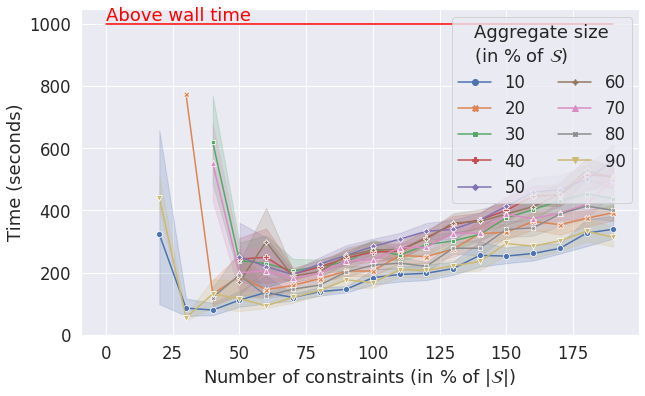

In [10]:
col_var = "clients_size"
col_x = "days_size_pc"
name_x = 'Number of constraints (in % of $|\mathcal{S}|$)'
x = 1000

sns.set(font_scale=1.5)

df_days = df[(df[col_var] == x) & (df.success == True) & (df.agg_size_pc > 0) & (df.agg_size_pc % 10 == 0)]

df_days = df_days.sort_values(["agg_size"])
df_days.agg_size = df_days.agg_size.astype(str)
df_days.agg_size_pc = df_days.agg_size_pc.astype(str)
    
    
ax = sns.lineplot(data=df_days, x=col_x, y="time", hue="agg_size_pc", style="agg_size_pc", markers=True, dashes=False)
    
ax.set(xlabel=name_x, ylabel='Time (seconds)')
    
    
plt.legend(bbox_to_anchor=(0.65, 1), loc=2, ncol=2, title="Aggregate size\n(in % of $\mathcal{S}$)")
#ax.legend()

    
if len(df_days[df_days.time > df_days.wall_time]) > 0:
    wall = df_days.wall_time.unique()[0]
    x_max = df_days[col_x].max()
        
    plt.plot([0, x_max], [wall, wall], linewidth=1.5, color="red")
    ax.text(0, wall +10, "Above wall time", horizontalalignment='left', size='medium', color='red')

## 2000

Success

In [11]:
df[df.clients_size == 2000].days_size_pc.unique()

array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
       650, 700, 750, 800,  10,  20,  30,  40,  60,  70,  80,  90, 110,
       120, 130, 140, 160, 170, 180, 190])

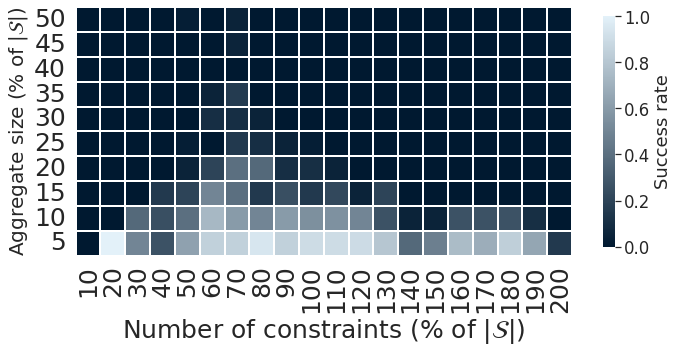

In [12]:
col_var = "clients_size"
col_x = "days_size_pc"
col_y = "agg_size_pc"
name_x = "Number of constraints (% of $|\mathcal{S}|$)"
name_y = "Aggregate size (% of $|\mathcal{S}|$)"
x = 2000

sns.set(font_scale=1.5)
    
df_hm = df[(df[col_var] == x) & (df.agg_size_pc <= 50) & (df.agg_size_pc > 0) & (df.days_size_pc <= 200) & (df.days_size_pc > 0)]

df_hm[col_x] = df_hm[col_x].astype(str)
df_hm[col_y] = df_hm[col_y].astype(str)
    
df_hm = pd.pivot_table(data=df_hm, values="success", index=[col_y], columns=[col_x])
cols = [str(x) for x in sorted([int(x) for x in df_hm.columns])]
df_hm = df_hm[cols]
df_hm.index = df_hm.index.map(int)
df_hm = df_hm.sort_values(by=[col_y], ascending=False)
    
    # Custom color
boundaries = [0.0, 1.0]  # custom boundaries
hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
    
hex_colors = ['#001930', '#e3f1f9']
#hex_colors = ['#007ff4', '#d7e9fb', '#e3f1f9']

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)
    
ax = sns.heatmap(data=df_hm, linewidths=.01, square=True, cmap=custom_color_map, cbar_kws={
    "shrink": 0.65,
    "label": "Success rate",
})
    
ax.set_xlabel(name_x, fontsize=fontsize)
ax.set_ylabel(name_y, fontsize=20)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
    
plt.tight_layout()
plt.yticks(rotation=0)

plt.savefig('./imgs/{}.pdf'.format('suc_issda_2000_2_w1'), bbox_inches = 'tight')

Time

In [13]:
col_var = "clients_size"
col_x = "days_size_pc"
name_x = 'Number of constraints (in % of $|\mathcal{S}|$)'
x = 2000

sns.set(font_scale=1.5)

df_days = df[(df[col_var] == x) & (df.success == True)]

df_days.agg_size = df_days.agg_size.astype(str)
df_days.agg_size_pc = df_days.agg_size_pc.astype(str)
    
    
ax = sns.lineplot(data=df_days, x=col_x, y="time", hue="agg_size_pc", style="agg_size_pc", markers=True, dashes=False, legend=False)
    
ax.set(xlabel=name_x, ylabel='Time (seconds)')
    
    
#plt.legend(bbox_to_anchor=(0.0, 0.45), loc=2, ncol=5, title="Aggregate size")
#ax.legend()

    
if len(df_days[df_days.time > df_days.wall_time]) > 0:
    wall = df_days.wall_time.unique()[0]
    x_max = df_days[col_x].max()
        
    plt.plot([0, x_max], [wall, wall], linewidth=1.5, color="red")
    ax.text(0, wall +10, "Above wall time", horizontalalignment='left', size='medium', color='red')

## V2 ISSDA w=2000

In [14]:
clients_with = "30_issda"
clients_without = None #"_hphc_"
wall_time = 2000

df = pd.read_csv("./v2_all.csv")

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))
if clients_without is not None:
    clients = list(filter(lambda x: clients_without not in x, clients))


df = df[(df["wall_time"] == wall_time) & (df["clients"].isin(clients))]
df.days_size = df.days_size.astype(int)
df.agg_size = df.agg_size.astype(int)
df.agg_size_pc = df.agg_size_pc.astype(int)
df.success = df.success.astype(int)

df.head(5)

Unnamed: 0                                              expe  \
279350           0  ./expes/v2_2021-03-23_issda-30_2000-prng-1-w2-p2   
279351           1  ./expes/v2_2021-03-23_issda-30_2000-prng-1-w2-p2   
279352           2  ./expes/v2_2021-03-23_issda-30_2000-prng-1-w2-p2   
279353           3  ./expes/v2_2021-03-23_issda-30_2000-prng-1-w2-p2   
279354           4  ./expes/v2_2021-03-23_issda-30_2000-prng-1-w2-p2   

              clients  clients_size clients_subset  agg_size method  \
279350  30_issda-2000          2000     first-2000      1000    rng   
279351  30_issda-2000          2000     first-2000       400    rng   
279352  30_issda-2000          2000     first-2000       500    rng   
279353  30_issda-2000          2000     first-2000       300    rng   
279354  30_issda-2000          2000     first-2000       300    rng   

                  days  days_size  days_total  ...  days_size_pc  \
279350  num-start-2200       2200       25726  ...           110   
279351  num-start-4000       4000       25726  ...           200   
279352   num-start-200        200       25726  ...            10   
279353  num-start-1000       1000       25726  ...            50   
279354  num-start-4000       4000       25726  ...           200   

        noise_method  score_avg  score_min  score_max  \
279350       classic        1.0        1.0        1.0   
279351       classic        1.0        1.0        1.0   
279352       classic        0.0        NaN        NaN   
279353       classic        1.0        1.0        1.0   
279354       classic        1.0        1.0        1.0   

                                                   oracle  pool_size  \
279350  ['1', '3', '4', '9', '12', '13', '14', '16', '...        2.0   
279351  ['1', '4', '9', '25', '47', '48', '53', '56', ...        2.0   
279352  ['7', '10', '14', '25', '28', '35', '41', '46'...        2.0   
279353  ['6', '10', '19', '24', '31', '32', '35', '36'...        2.0   
279354  ['3', '26', '28', '29', '34', '45', '47', '55'...        2.0   

              uuid  infeasible  optimal  
279350  1e23ac868c         0.0      0.0  
279351  60a4c57a6d         0.0      1.0  
279352  5f30f84c39         0.0      0.0  
279353  c85322ed0e         0.0      0.0  
279354  e275293236         0.0      0.0  

[5 rows x 30 columns]

In [15]:
col_var = "clients_size"
col_x = "days_size_pc"
col_y = "agg_size_pc"
name_x = "Number of constraints (% of $|\mathcal{S}|$)"
name_y = "Aggregate size (% of $|\mathcal{S}|$)"
x = 2000

sns.set(font_scale=1.5)
    
df_hm = df[(df[col_var] == x) ]
df_hm[col_x] = df_hm[col_x].astype(str)
df_hm[col_y] = df_hm[col_y].astype(str)
    
df_hm = pd.pivot_table(data=df_hm, values="success", index=[col_y], columns=[col_x])
cols = [str(x) for x in sorted([int(x) for x in df_hm.columns])]
df_hm = df_hm[cols]
df_hm.index = df_hm.index.map(int)
df_hm = df_hm.sort_values(by=[col_y], ascending=False)
    
    # Custom color
boundaries = [0.0, 1.0]  # custom boundaries
hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
    
hex_colors = ['#001930', '#e3f1f9']
#hex_colors = ['#007ff4', '#d7e9fb', '#e3f1f9']

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)
    
ax = sns.heatmap(data=df_hm, linewidths=.01, square=True, cmap=custom_color_map, cbar_kws={
    "shrink": 0.65,
    "label": "Success rate",
})
    
ax.set_xlabel(name_x, fontsize=fontsize)
ax.set_ylabel(name_y, fontsize=20)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
    
plt.tight_layout()
plt.yticks(rotation=0)

plt.savefig('./imgs/{}.pdf'.format('suc_issda_2000_2_w2'), bbox_inches = 'tight')

In [16]:
col_var = "clients_size"
col_x = "days_size_pc"
name_x = 'Number of constraints (% of $|\mathcal{S}|$)'
x = 2000

sns.set(font_scale=1.5)

df_days = df[(df[col_var] == x) & (df.success == True)]
df_days = df_days.sort_values(["agg_size"])
df_days.agg_size = df_days.agg_size.astype(str)
df_days.agg_size_pc = df_days.agg_size_pc.astype(str)
    
    
ax = sns.lineplot(data=df_days, x=col_x, y="time", hue="agg_size_pc", style="agg_size_pc", markers=True, dashes=False, legend=False)
    
ax.set(xlabel=name_x, ylabel='Time (seconds)')
    
    
#plt.legend(bbox_to_anchor=(0.0, 0.45), loc=2, ncol=5, title="Aggregate size")
#ax.legend()

    
if len(df_days[df_days.time > df_days.wall_time]) > 0:
    wall = df_days.wall_time.unique()[0]
    x_max = df_days[col_x].max()
        
    plt.plot([0, x_max], [wall, wall], linewidth=1.5, color="red")
    ax.text(0, wall +10, "Above wall time", horizontalalignment='left', size='medium', color='red')
    
ax.set_xlabel(name_x, fontsize=fontsize)
ax.set_ylabel(name_y, fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.savefig('./imgs/{}.pdf'.format('time_issda_2000_2_w2'), bbox_inches = 'tight')

## V2 ISSDA w=4000

In [17]:
clients_with = "30_issda"
clients_without = None #"_hphc_"
wall_time = 4000

df = pd.read_csv("./v2_all.csv")

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))
if clients_without is not None:
    clients = list(filter(lambda x: clients_without not in x, clients))


df = df[(df["wall_time"] == wall_time) & (df["clients"].isin(clients))]
df.days_size = df.days_size.astype(int)
df.agg_size = df.agg_size.astype(int)
df.agg_size_pc = df.agg_size_pc.astype(int)
df.success = df.success.astype(int)

df.head(5)

Unnamed: 0                                              expe  \
104423           0  ./expes/v2_2021-03-26_issda-30_2000-prng-1-w4-p2   
104424           1  ./expes/v2_2021-03-26_issda-30_2000-prng-1-w4-p2   
104425           2  ./expes/v2_2021-03-26_issda-30_2000-prng-1-w4-p2   
104426           3  ./expes/v2_2021-03-26_issda-30_2000-prng-1-w4-p2   
104427           4  ./expes/v2_2021-03-26_issda-30_2000-prng-1-w4-p2   

              clients  clients_size clients_subset  agg_size method  \
104423  30_issda-2000          2000     first-2000      1000    rng   
104424  30_issda-2000          2000     first-2000       600    rng   
104425  30_issda-2000          2000     first-2000       700    rng   
104426  30_issda-2000          2000     first-2000       100    rng   
104427  30_issda-2000          2000     first-2000      1000    rng   

                  days  days_size  days_total  ...  days_size_pc  \
104423  num-start-1600       1600       25726  ...            80   
104424  num-start-3400       3400       25726  ...           170   
104425  num-start-2400       2400       25726  ...           120   
104426  num-start-3400       3400       25726  ...           170   
104427   num-start-600        600       25726  ...            30   

        noise_method  score_avg  score_min  score_max  \
104423       classic        1.0        1.0        1.0   
104424       classic        1.0        1.0        1.0   
104425       classic        1.0        1.0        1.0   
104426       classic        1.0        1.0        1.0   
104427       classic        0.0        NaN        NaN   

                                                   oracle  pool_size  \
104423  ['1', '3', '4', '5', '7', '8', '14', '15', '16...        2.0   
104424  ['4', '5', '12', '18', '19', '21', '22', '26',...        2.0   
104425  ['4', '5', '12', '16', '18', '19', '21', '22',...        2.0   
104426  ['5', '19', '45', '46', '53', '59', '60', '63'...        2.0   
104427  ['1', '3', '4', '5', '7', '8', '14', '15', '16...        2.0   

              uuid  infeasible  optimal  
104423  18662bc45b         0.0      1.0  
104424  f2eaebad0d         0.0      1.0  
104425  e48ddefa43         0.0      1.0  
104426  c133de17a3         0.0      1.0  
104427  db74dcaa31         0.0      0.0  

[5 rows x 30 columns]

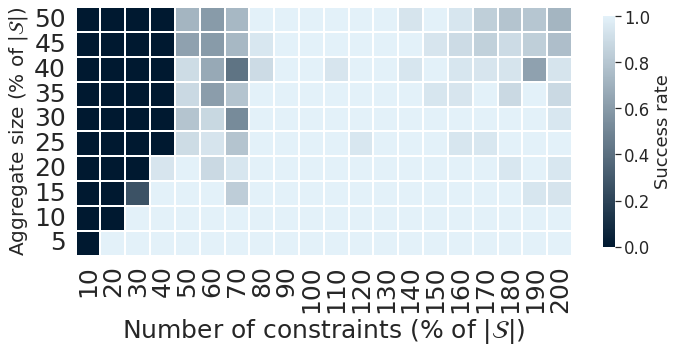

In [18]:
col_var = "clients_size"
col_x = "days_size_pc"
col_y = "agg_size_pc"
name_x = "Number of constraints (% of $|\mathcal{S}|$)"
name_y = "Aggregate size (% of $|\mathcal{S}|$)"
x = 2000

sns.set(font_scale=1.5)
    
df_hm = df[(df[col_var] == x) ]
df_hm[col_x] = df_hm[col_x].astype(str)
df_hm[col_y] = df_hm[col_y].astype(str)
    
df_hm = pd.pivot_table(data=df_hm, values="success", index=[col_y], columns=[col_x])
cols = [str(x) for x in sorted([int(x) for x in df_hm.columns])]
df_hm = df_hm[cols]
df_hm.index = df_hm.index.map(int)
df_hm = df_hm.sort_values(by=[col_y], ascending=False)
    
    # Custom color
boundaries = [0.0, 1.0]  # custom boundaries
hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
    
hex_colors = ['#001930', '#e3f1f9']
#hex_colors = ['#007ff4', '#d7e9fb', '#e3f1f9']

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)
    
ax = sns.heatmap(data=df_hm, linewidths=.01, square=True, cmap=custom_color_map, cbar_kws={
    "shrink": 0.65,
    "label": "Success rate",
})
    
    
ax.set_xlabel(name_x, fontsize=fontsize)
ax.set_ylabel(name_y, fontsize=20)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
    
plt.tight_layout()
plt.yticks(rotation=0)

plt.savefig('./imgs/{}.pdf'.format('suc_issda_2000_2_w4'), bbox_inches = 'tight')

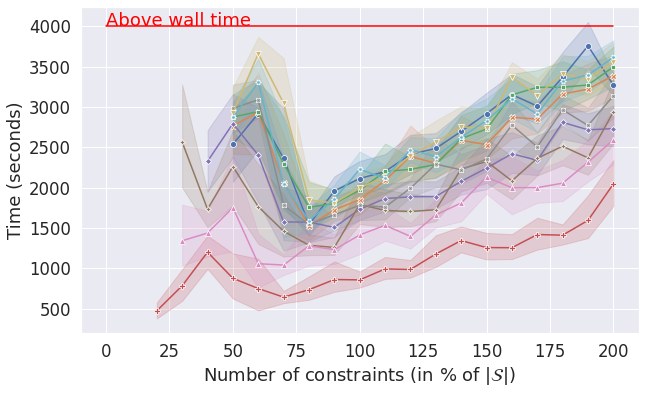

In [19]:
col_var = "clients_size"
col_x = "days_size_pc"
name_x = 'Number of constraints (in % of $|\mathcal{S}|$)'
x = 2000

sns.set(font_scale=1.5)

df_days = df[(df[col_var] == x) & (df.success == True)]
df_days.agg_size = df_days.agg_size.astype(str)
df_days.agg_size_pc = df_days.agg_size_pc.astype(str)
    
    
ax = sns.lineplot(data=df_days, x=col_x, y="time", hue="agg_size_pc", style="agg_size_pc", markers=True, dashes=False, legend=False)
    
ax.set(xlabel=name_x, ylabel='Time (seconds)')
    
    
#plt.legend(bbox_to_anchor=(0.0, 0.45), loc=2, ncol=5, title="Aggregate size")
#ax.legend()

    
if len(df_days[df_days.time > df_days.wall_time]) > 0:
    wall = df_days.wall_time.unique()[0]
    x_max = df_days[col_x].max()
        
    plt.plot([0, x_max], [wall, wall], linewidth=1.5, color="red")
    ax.text(0, wall +10, "Above wall time", horizontalalignment='left', size='medium', color='red')

## V2 ISSDA w=5000

In [20]:
clients_with = "30_issda"
clients_without = None #"_hphc_"
wall_time = 5000

df = pd.read_csv("./v2_all.csv")

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))
if clients_without is not None:
    clients = list(filter(lambda x: clients_without not in x, clients))


df = df[(df["wall_time"] == wall_time) & (df["clients"].isin(clients))]
df.days_size = df.days_size.astype(int)
df.agg_size = df.agg_size.astype(int)
df.agg_size_pc = df.agg_size_pc.astype(int)
df.success = df.success.astype(int)

df.head(5)

Unnamed: 0                                          expe        clients  \
1734           0  ./expes/v2_2021-01-07_hi_4500-prng-w5-d500-1  30_issda-4500   
1735           1  ./expes/v2_2021-01-07_hi_4500-prng-w5-d500-1  30_issda-4500   
1736           0  ./expes/v2_2021-01-07_hi_4500-prng-w5-d500-1  30_issda-4500   
1737           1  ./expes/v2_2021-01-07_hi_4500-prng-w5-d500-1  30_issda-4500   
1738           2  ./expes/v2_2021-01-07_hi_4500-prng-w5-d500-1  30_issda-4500   

      clients_size clients_subset  agg_size method            days  days_size  \
1734          4500       rng-4500      1680    rng  num-start-7501       7501   
1735          4500       rng-4500      2128    rng     num-start-1          1   
1736          4500       rng-4500       224    rng  num-start-4001       4001   
1737          4500       rng-4500       560    rng  num-start-5501       5501   
1738          4500       rng-4500      1680    rng  num-start-6001       6001   

      days_total  ...  days_size_pc  noise_method  score_avg  score_min  \
1734       25726  ...           166        normal        NaN        NaN   
1735       25726  ...             0        normal        NaN        NaN   
1736       25726  ...            88        normal        NaN        NaN   
1737       25726  ...           122        normal        NaN        NaN   
1738       25726  ...           133        normal        NaN        NaN   

      score_max  oracle  pool_size  uuid  infeasible  optimal  
1734        NaN     NaN        NaN   NaN         NaN      NaN  
1735        NaN     NaN        NaN   NaN         NaN      NaN  
1736        NaN     NaN        NaN   NaN         NaN      NaN  
1737        NaN     NaN        NaN   NaN         NaN      NaN  
1738        NaN     NaN        NaN   NaN         NaN      NaN  

[5 rows x 30 columns]

### 2000

Success

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '50'),
  Text(0, 1.5, '45'),
  Text(0, 2.5, '40'),
  Text(0, 3.5, '35'),
  Text(0, 4.5, '30'),
  Text(0, 5.5, '25'),
  Text(0, 6.5, '20'),
  Text(0, 7.5, '15'),
  Text(0, 8.5, '10'),
  Text(0, 9.5, '5')])

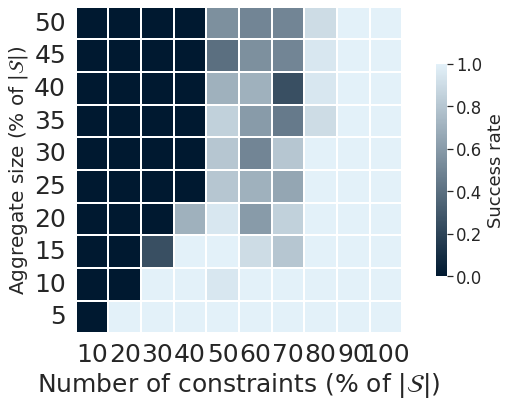

In [21]:
col_var = "clients_size"
col_x = "days_size_pc"
col_y = "agg_size_pc"
name_x = "Number of constraints (% of $|\mathcal{S}|$)"
name_y = "Aggregate size (% of $|\mathcal{S}|$)"
x = 2000

sns.set(font_scale=1.5)
    
df_hm = df[(df[col_var] == x) ]
df_hm[col_x] = df_hm[col_x].astype(str)
df_hm[col_y] = df_hm[col_y].astype(str)
    
df_hm = pd.pivot_table(data=df_hm, values="success", index=[col_y], columns=[col_x])
cols = [str(x) for x in sorted([int(x) for x in df_hm.columns])]
df_hm = df_hm[cols]
df_hm.index = df_hm.index.map(int)
df_hm = df_hm.sort_values(by=[col_y], ascending=False)
    
    # Custom color
boundaries = [0.0, 1.0]  # custom boundaries
hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
    
hex_colors = ['#001930', '#e3f1f9']
#hex_colors = ['#007ff4', '#d7e9fb', '#e3f1f9']

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)
    
ax = sns.heatmap(data=df_hm, linewidths=.01, square=True, cmap=custom_color_map, cbar_kws={
    "shrink": 0.65,
    "label": "Success rate",
})
    
    
ax.set_xlabel(name_x, fontsize=fontsize)
ax.set_ylabel(name_y, fontsize=20)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
    
plt.tight_layout()
plt.yticks(rotation=0)

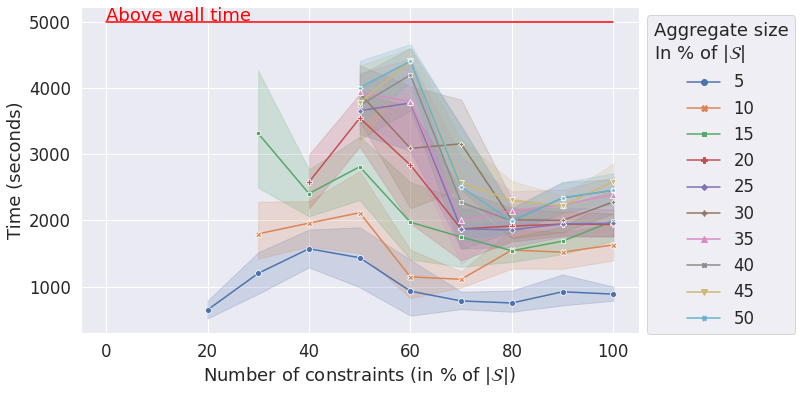

In [22]:
col_var = "clients_size"
col_x = "days_size_pc"
name_x = 'Number of constraints (in % of $|\mathcal{S}|$)'
x = 2000

sns.set(font_scale=1.5)

df_days = df[(df[col_var] == x) & (df.success == True)]
df_days = df_days.sort_values(["agg_size"])
df_days.agg_size = df_days.agg_size.astype(str)
df_days.agg_size_pc = df_days.agg_size_pc.astype(str)
    
    
ax = sns.lineplot(data=df_days, x=col_x, y="time", hue="agg_size_pc", style="agg_size_pc", markers=True, dashes=False)
    
ax.set(xlabel=name_x, ylabel='Time (seconds)')
    
    
plt.legend(bbox_to_anchor=(1, 1), loc=2, ncol=1, title="Aggregate size\nIn % of $|\mathcal{S}|$")
#ax.legend()

    
if len(df_days[df_days.time > df_days.wall_time]) > 0:
    wall = df_days.wall_time.unique()[0]
    x_max = df_days[col_x].max()
        
    plt.plot([0, x_max], [wall, wall], linewidth=1.5, color="red")
    ax.text(0, wall +10, "Above wall time", horizontalalignment='left', size='medium', color='red')

## V2  ISSDA w=8000

In [23]:
clients_with = "30_issda"
clients_without = None #"_hphc_"
wall_time = 8000

df = pd.read_csv("./v2_all.csv")

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))
if clients_without is not None:
    clients = list(filter(lambda x: clients_without not in x, clients))


df = df[(df["wall_time"] == wall_time) & (df["clients"].isin(clients))]
df.days_size = df.days_size.astype(int)
df.agg_size = df.agg_size.astype(int)
df.agg_size_pc = df.agg_size_pc.astype(int)
df.success = df.success.astype(int)

df.head(5)

Unnamed: 0                                              expe  \
302892           0  ./expes/v2_2021-03-23_issda-30_2000-prng-1-w4-p2   
302893           1  ./expes/v2_2021-03-23_issda-30_2000-prng-1-w4-p2   
302894           2  ./expes/v2_2021-03-23_issda-30_2000-prng-1-w4-p2   
302895           3  ./expes/v2_2021-03-23_issda-30_2000-prng-1-w4-p2   
302896           4  ./expes/v2_2021-03-23_issda-30_2000-prng-1-w4-p2   

              clients  clients_size clients_subset  agg_size method  \
302892  30_issda-2000          2000     first-2000       500    rng   
302893  30_issda-2000          2000     first-2000       300    rng   
302894  30_issda-2000          2000     first-2000       300    rng   
302895  30_issda-2000          2000     first-2000       800    rng   
302896  30_issda-2000          2000     first-2000       600    rng   

                  days  days_size  days_total  ...  days_size_pc  \
302892  num-start-2000       2000       25726  ...           100   
302893   num-start-400        400       25726  ...            20   
302894  num-start-1000       1000       25726  ...            50   
302895  num-start-2000       2000       25726  ...           100   
302896  num-start-2000       2000       25726  ...           100   

        noise_method  score_avg  score_min  score_max  \
302892       classic        1.0        1.0        1.0   
302893       classic        0.0        NaN        NaN   
302894       classic        1.0        1.0        1.0   
302895       classic        1.0        1.0        1.0   
302896       classic        1.0        1.0        1.0   

                                                   oracle  pool_size  \
302892  ['4', '9', '10', '11', '18', '33', '37', '40',...        2.0   
302893  ['3', '26', '28', '29', '34', '45', '47', '55'...        2.0   
302894  ['6', '9', '11', '16', '31', '52', '66', '67',...        2.0   
302895  ['4', '8', '10', '11', '15', '16', '24', '27',...        2.0   
302896  ['1', '2', '4', '10', '16', '21', '22', '31', ...        2.0   

              uuid  infeasible  optimal  
302892  d94a911c81         0.0      1.0  
302893  e0f0f16a89         0.0      0.0  
302894  ac191bcb8a         0.0      1.0  
302895  772da93437         0.0      1.0  
302896  dde26ba770         0.0      1.0  

[5 rows x 30 columns]

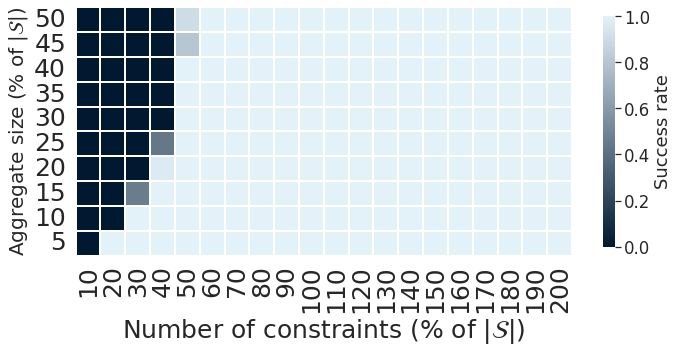

In [24]:
col_var = "clients_size"
col_x = "days_size_pc"
col_y = "agg_size_pc"
name_x = "Number of constraints (% of $|\mathcal{S}|$)"
name_y = "Aggregate size (% of $|\mathcal{S}|$)"
x = 2000

sns.set(font_scale=1.5)
    
df_hm = df[(df[col_var] == x) ]
df_hm[col_x] = df_hm[col_x].astype(str)
df_hm[col_y] = df_hm[col_y].astype(str)
    
df_hm = pd.pivot_table(data=df_hm, values="success", index=[col_y], columns=[col_x])
cols = [str(x) for x in sorted([int(x) for x in df_hm.columns])]
df_hm = df_hm[cols]
df_hm.index = df_hm.index.map(int)
df_hm = df_hm.sort_values(by=[col_y], ascending=False)
    
    # Custom color
boundaries = [0.0, 1.0]  # custom boundaries
hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
    
hex_colors = ['#001930', '#e3f1f9']
#hex_colors = ['#007ff4', '#d7e9fb', '#e3f1f9']

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)
    
ax = sns.heatmap(data=df_hm, linewidths=.01, square=True, cmap=custom_color_map, cbar_kws={
    "shrink": 0.65,
    "label": "Success rate",
})
    
ax.set_xlabel(name_x, fontsize=fontsize)
ax.set_ylabel(name_y, fontsize=20)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
    
plt.tight_layout()
plt.yticks(rotation=0)

plt.savefig('./imgs/{}.pdf'.format('suc_issda_2000_2_w8'), bbox_inches = 'tight')

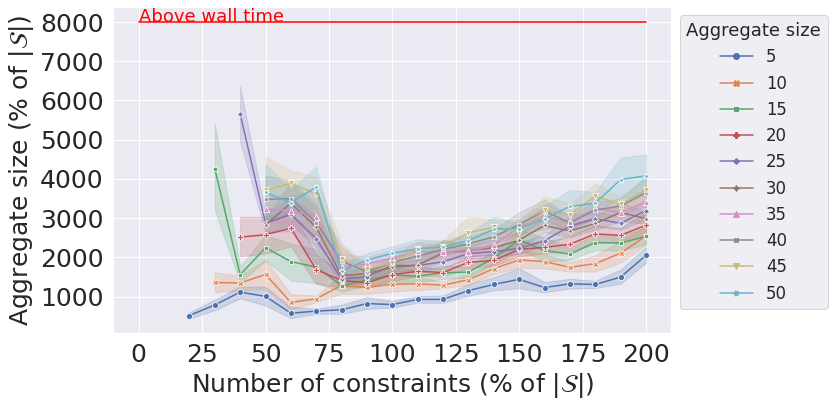

In [25]:
col_var = "clients_size"
col_x = "days_size_pc"
name_x = 'Number of constraints (% of $|\mathcal{S}|$)'
x = 2000

sns.set(font_scale=1.5)

df_days = df[(df[col_var] == x) & (df.success == True)]
df_days = df_days.sort_values(["agg_size"])
df_days.agg_size = df_days.agg_size.astype(str)
df_days.agg_size_pc = df_days.agg_size_pc.astype(str)
    
    
ax = sns.lineplot(data=df_days, x=col_x, y="time", hue="agg_size_pc", style="agg_size_pc", markers=True, dashes=False)
    
ax.set(xlabel=name_x, ylabel='Time (seconds)')
    
    
plt.legend(bbox_to_anchor=(1, 1), loc=2, ncol=1, title="Aggregate size")
#ax.legend()

    
if len(df_days[df_days.time > df_days.wall_time]) > 0:
    wall = df_days.wall_time.unique()[0]
    x_max = df_days[col_x].max()
        
    plt.plot([0, x_max], [wall, wall], linewidth=1.5, color="red")
    ax.text(0, wall +10, "Above wall time", horizontalalignment='left', size='medium', color='red')

ax.set_xlabel(name_x, fontsize=fontsize)
ax.set_ylabel(name_y, fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
    
plt.savefig('./imgs/{}.pdf'.format('time_issda_2000_2_w8'), bbox_inches = 'tight')

## V3 ISSDA 4500

In [26]:
clients_with = "30_issda"
wall_time = 86400
clients_without = None #"_hphc_"

df = pd.read_csv("./v3_all.csv")

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))
if clients_without is not None:
    clients = list(filter(lambda x: clients_without not in x, clients))


df = df[(df["wall_time"] == wall_time) & (df["clients"].isin(clients))]

df.clients_size = df.clients_size.astype(int)
df.days_size = df.days_size.astype(int)
df.days_size_pc = df.days_size_pc.astype(int)
df.agg_size = df.agg_size.astype(int)
df.agg_size_pc = df.agg_size_pc.astype(int)
df.success = df.success.astype(int)


df.head(5)

Unnamed: 0                                              expe  \
63459           0  ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63460           0  ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63461           0  ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63462           0  ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   
63463           1  ./expes/v3_2021-02-23_hi_4500-prng-1-w86-p100-t2   

             clients  clients_size clients_subset  agg_size  agg_size_pc  \
63459  30_issda-4500          4500     first-4500       450           10   
63460  30_issda-4500          4500     first-4500       450           10   
63461  30_issda-4500          4500     first-4500       450           10   
63462  30_issda-4500          4500     first-4500      1350           30   
63463  30_issda-4500          4500     first-4500      1575           35   

      method            days  days_size  ...  wall_hit wall_time  pooled  \
63459    rng  num-start-3150       3150  ...     False     86400    True   
63460    rng   num-start-450        450  ...      True     86400    True   
63461    rng   num-start-450        450  ...      True     86400    True   
63462    rng  num-start-2700       2700  ...     False     86400    True   
63463    rng  num-start-3600       3600  ...     False     86400    True   

       pool_size        uuid  optimal  valid_sums  days_size_pc  infeasible  \
63459        100  9f1b80b8e2      1.0         1.0            70         NaN   
63460        100  7cb69420eb      0.0         0.0            10         NaN   
63461        100  5a34d5419e      0.0         0.0            10         NaN   
63462        100  5372e781ce      1.0         1.0            60         NaN   
63463        100  320d8593a6      1.0         1.0            80         NaN   

       Unnamed: 0.1  
63459           NaN  
63460           NaN  
63461           NaN  
63462           NaN  
63463           NaN  

[5 rows x 31 columns]

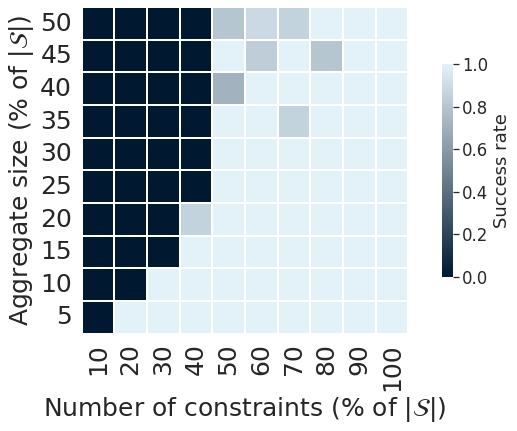

In [27]:
col_var = "clients_size"
col_x = "days_size_pc"
col_y = "agg_size_pc"
name_x = "Number of constraints (% of $|\mathcal{S}|$)"
name_y = "Aggregate size (% of $|\mathcal{S}|$)"
x = 4500

sns.set(font_scale=1.5)
    
df_hm = df[(df[col_var] == x) ]
df_hm[col_x] = df_hm[col_x].astype(str)
df_hm[col_y] = df_hm[col_y].astype(str)
    
df_hm = pd.pivot_table(data=df_hm, values="success", index=[col_y], columns=[col_x])
cols = [str(x) for x in sorted([int(x) for x in df_hm.columns])]
df_hm = df_hm[cols]
df_hm.index = df_hm.index.map(int)
df_hm = df_hm.sort_values(by=[col_y], ascending=False)

# There is some "holes" (NaN values) when I modify the graph 1 years later. 
# Probably deleted some files by accident when my disk was full or not uploaded them to the git.
# Filling them so they match the old graphs. (bad I know, no time to relaunch).
df_hm["30"].fillna(0., inplace=True)
df_hm["40"].fillna(0., inplace=True)
df_hm["90"].fillna(1., inplace=True)
df_hm["100"].fillna(1., inplace=True)

    
    # Custom color
boundaries = [0.0, 1.0]  # custom boundaries
hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
    
hex_colors = ['#001930', '#e3f1f9']
#hex_colors = ['#007ff4', '#d7e9fb', '#e3f1f9']

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)
    
ax = sns.heatmap(data=df_hm, linewidths=.01, square=True, cmap=custom_color_map, cbar_kws={
    "shrink": 0.65,
    "label": "Success rate",
})
    
ax.set_xlabel(name_x, fontsize=fontsize)
ax.set_ylabel(name_y, fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
    
plt.tight_layout()
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.savefig('./imgs/{}.pdf'.format('suc_isssda_4500_100_w86'), bbox_inches = 'tight')

Time

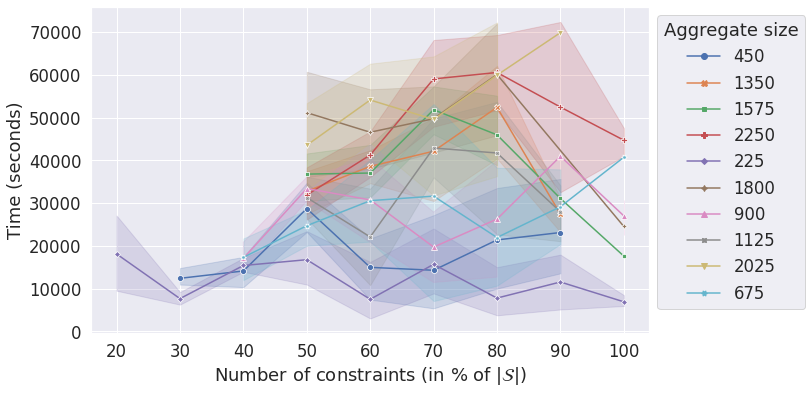

In [28]:
col_var = "clients_size"
col_x = "days_size_pc"
name_x = 'Number of constraints (in % of $|\mathcal{S}|$)'
x = 4500

sns.set(font_scale=1.5)

df_days = df[(df[col_var] == x) & (df.success == True)]
df_days.agg_size = df_days.agg_size.astype(str)
    
    
ax = sns.lineplot(data=df_days, x=col_x, y="time", hue="agg_size", style="agg_size", markers=True, dashes=False)
    
ax.set(xlabel=name_x, ylabel='Time (seconds)')
    
    
plt.legend(bbox_to_anchor=(1, 1), loc=2, ncol=1, title="Aggregate size")
#ax.legend()

    
if len(df_days[df_days.time > df_days.wall_time]) > 0:
    wall = df_days.wall_time.unique()[0]
    x_max = df_days[col_x].max()
        
    plt.plot([0, x_max], [wall, wall], linewidth=1.5, color="red")
    ax.text(0, wall +10, "Above wall time", horizontalalignment='left', size='medium', color='red')

## V3 London 4500

In [29]:
clients_with = "london"
wall_time = 86400
clients_without = None #"_hphc_"

df = pd.read_csv("./v3_all.csv")

clients = df["clients"].unique()
clients = list(filter(lambda x: clients_with in x, clients))
if clients_without is not None:
    clients = list(filter(lambda x: clients_without not in x, clients))


df = df[(df["wall_time"] == wall_time) & (df["clients"].isin(clients))]

df.clients_size = df.clients_size.astype(int)
df.days_size = df.days_size.astype(int)
df.days_size_pc = df.days_size_pc.astype(int)
df.agg_size = df.agg_size.astype(int)
df.agg_size_pc = df.agg_size_pc.astype(int)
df.success = df.success.astype(int)


df.head(5)

Unnamed: 0                                               expe  \
23986           0  ./expes/v3_2021-03-19_london-c_4500-prng-1-w86...   
23987           0  ./expes/v3_2021-03-19_london-c_4500-prng-1-w86...   
23988           0  ./expes/v3_2021-03-19_london-c_4500-prng-1-w86...   
23989           0  ./expes/v3_2021-03-19_london-c_4500-prng-1-w86...   
23990           0  ./expes/v3_2021-03-19_london-c_4500-prng-1-w86...   

                 clients  clients_size clients_subset  agg_size  agg_size_pc  \
23986  london_clean-4500          4500     first-4500      1125           25   
23987  london_clean-4500          4500     first-4500      1125           25   
23988  london_clean-4500          4500     first-4500      1350           30   
23989  london_clean-4500          4500     first-4500      1125           25   
23990  london_clean-4500          4500     first-4500      2250           50   

      method            days  days_size  ...  wall_hit wall_time  pooled  \
23986    rng  num-start-2250       2250  ...     False     86400    True   
23987    rng  num-start-4050       4050  ...     False     86400    True   
23988    rng   num-start-450        450  ...      True     86400    True   
23989    rng   num-start-450        450  ...      True     86400    True   
23990    rng  num-start-4050       4050  ...     False     86400    True   

       pool_size        uuid  optimal  valid_sums  days_size_pc  infeasible  \
23986        100  657ce9862b      1.0         1.0            50         0.0   
23987        100  cfcd47983e      1.0         1.0            90         0.0   
23988        100  68b8d038e6      0.0         0.0            10         0.0   
23989        100  d0dad98942      0.0         0.0            10         0.0   
23990        100  9d8e96d93c      1.0         1.0            90         0.0   

       Unnamed: 0.1  
23986           NaN  
23987           NaN  
23988           NaN  
23989           NaN  
23990           NaN  

[5 rows x 31 columns]

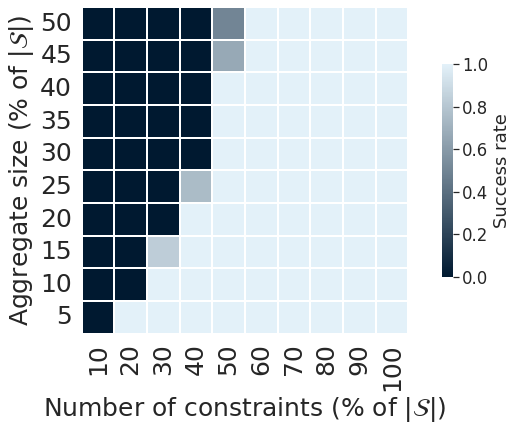

In [30]:
col_var = "clients_size"
col_x = "days_size_pc"
col_y = "agg_size_pc"
name_x = "Number of constraints (% of $|\mathcal{S}|$)"
name_y = "Aggregate size (% of $|\mathcal{S}|$)"
x = 4500

sns.set(font_scale=1.5)
    
df_hm = df[(df[col_var] == x) ]
df_hm[col_x] = df_hm[col_x].astype(str)
df_hm[col_y] = df_hm[col_y].astype(str)
    
df_hm = pd.pivot_table(data=df_hm, values="success", index=[col_y], columns=[col_x])
cols = [str(x) for x in sorted([int(x) for x in df_hm.columns])]
df_hm = df_hm[cols]
df_hm.index = df_hm.index.map(int)
df_hm = df_hm.sort_values(by=[col_y], ascending=False)

# There is some "holes" (NaN values) when I modify the graph 1 years later. 
# Probably deleted some files by accident when my disk was full or not uploaded them to the git.
# Filling them so they match the old graphs. (bad I know, no time to relaunch).
df_hm["30"].fillna(0., inplace=True)
df_hm["40"].fillna(0., inplace=True)
df_hm["80"].fillna(1., inplace=True)
    
    # Custom color
boundaries = [0.0, 1.0]  # custom boundaries
hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
    
hex_colors = ['#001930', '#e3f1f9']
#hex_colors = ['#e3f1f9', '#001930']
#hex_colors = ['#007ff4', '#d7e9fb', '#e3f1f9']

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)
    
ax = sns.heatmap(data=df_hm, linewidths=.01, square=True, cmap=custom_color_map, cbar_kws={
    "shrink": 0.65,
    "label": "Success rate",
})
    
ax.set_xlabel(name_x, fontsize=fontsize)
ax.set_ylabel(name_y, fontsize=fontsize)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
    
plt.tight_layout()
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.savefig('./imgs/{}.pdf'.format('suc_london_4500_100_w86'), bbox_inches = 'tight')

Time

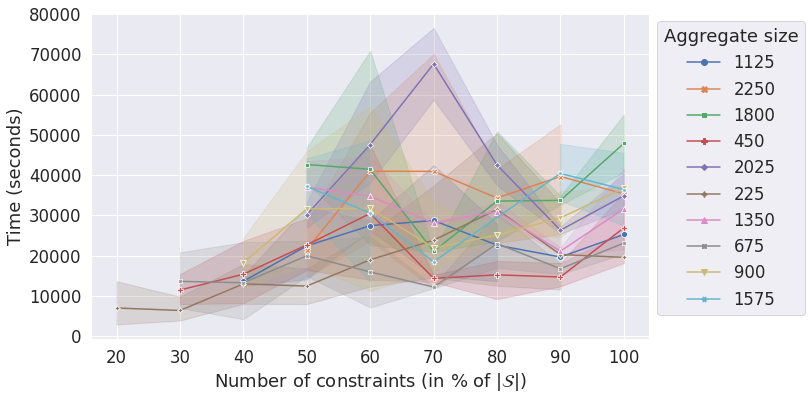

In [31]:
col_var = "clients_size"
col_x = "days_size_pc"
name_x = 'Number of constraints (in % of $|\mathcal{S}|$)'
x = 4500

sns.set(font_scale=1.5)

df_days = df[(df[col_var] == x) & (df.success == True)]
df_days.agg_size = df_days.agg_size.astype(str)
    
    
ax = sns.lineplot(data=df_days, x=col_x, y="time", hue="agg_size", style="agg_size", markers=True, dashes=False)
    
ax.set(xlabel=name_x, ylabel='Time (seconds)')
    
    
plt.legend(bbox_to_anchor=(1, 1), loc=2, ncol=1, title="Aggregate size")
#ax.legend()

    
if len(df_days[df_days.time > df_days.wall_time]) > 0:
    wall = df_days.wall_time.unique()[0]
    x_max = df_days[col_x].max()
        
    plt.plot([0, x_max], [wall, wall], linewidth=1.5, color="red")
    ax.text(0, wall +10, "Above wall time", horizontalalignment='left', size='medium', color='red')